# Improving Neural Networks Training

## Train/Dev/Test Sets

We usually split our data into three set, the training set, development (Dev, cross-validation) set, and testing set.

-	Train models on train set
-	Test these models on Dev set and choose model with best performance
-	Evaluate the best model on the Test set to get an unbiased estimate of how good the model is.

Previously machine learning engineers used to split about 10-20% of the data for each of the dev and test sets. In big data era, we do not do that anymore. The development and test sets now represent <1% of the data (when talking about >1M samples), even that would be more than 10K examples. Not having a test set is fine as long as you have a dev set.

A rule of thumb is to make sure the Dev & Test sets to come from the same distribution, the training set may be different.

For example, we expect our traffic to come from Eastern Europe and the Middle East, while the training data is from Western Europe and US.

**Train Data:**
1.	Germany
2.	France
3.	United Kingdom
4.	Spain
5.	USA

**Dev\Test Data**

Middle East
1.	Jordan
2.	Lebanon
3.	Syria
4.	Iraq

Eastern Europe:
1.	Russia
2.	Ukraine
3.	Poland
4.	Romania
5.	Belarus
6.	Czech Republic

A bad practice here would be to take the data from Middle East as *Dev set*, and the data from Eastern Europe as *Test set*, as they do not come from the same distribution anymore. It would better to shuffle the data then sample randomly into Dev and Test set.


## Bias/Variance

Bias is how much the predicted values differ from the actual values. Bias is the inability of a machine learning model to capture the true relationship between the data variables. **It is caused by the erroneous assumptions that are inherent to the learning algorithm**. For example, in linear regression, the relationship between the X and the Y variable is assumed to be linear, when in reality the relationship may not be perfectly linear.

variance refers to how much a model's predictions vary or swing around the true values. If a model has high variance, it means it's sensitive to small changes in the training data, which can cause it to make very different predictions when given slightly different input. For example, if two different engineers overfit a data that are very slightly different. They are going to get completely different results. While if the model generalized to the data, the differences will be very minimal. Overfitting (high variance)  occurs when a model learns to memorize the training data too well, capturing noise and random fluctuations in the data rather than the underlying patterns.


<table style="background-color: white; color: black;">
<tr>
  <th>An underfit model</th>
  <th>A good fit, generalized well</th>
  <th>Overfit model</th>
</tr>
<tr>
  <td>
   <img src="images/bias - variance/high bias.png" alt="underfit" />
  </td>

  <td>
   <img src="images/bias - variance/good fit.png" alt="Generalized"/>
  </td>
  <td>
   <img src="images/bias - variance/overfit.png" alt="Overfit">
  </td>
</tr>
</table>

- The underfit model, cannot predict the training examples well, so we say it has high bias
- We say that the second model was able to generalize well to the data, it has small error and was able to understand the pattern the data have
- The third model is overfitting the data, it can predict the values of the training data too well, but if we try to predict the price for a new size it would most probably be off by a good margin. For example, after the third point, the model says that the price decreases although the size is increasing which is obviously wrong.

That’s how we can visualize bias and variance in 2 dimensions. But larger number of dimensions we are not able to do this visualization, so how do we check for bias and variance in this case?

We can do that through the error:

Let's reconsider the cat classification problem assuming the best possible accuracy is 100% (0% error):

<table style="background-color: white; color: black;">
<tr>
  <th>y = 1</th>
  <th>y = 0</th>
</tr>
<tr>
  <td>
   <img src="images/bias - variance/cat.jpg" alt="cat" height="300px" width="300px"/>
  </td>

  <td>
   <img src="images/bias - variance/doge.png" alt="dog" height="300px" width="300px"/>
  </td>
</tr>
</table>

<table style="background-color: white; color: black; font-size: 15px;">
<tr>
  <th>Error</th>
  <th>example 1</th>
  <th>example 2</th>
  <th>example 3</th>
  <th>example 4</th>
</tr>
<tr>
  <td>Train set error</td>
  <td>1%</td>
  <td>15%</td>
  <td>15%</td>
  <td>0.5%</td>
</tr>
<tr>
  <td>Test set error</td>
  <td>11%</td>
  <td>16%</td>
  <td>30%</td>
  <td>1%</td>
</tr>
<tr>
  <td>Characteristics</td>
  <td>high variance</td>
  <td>high bias</td>
  <td>high variance and high bias</td>
  <td>low bias and low variance</td>
</tr>
</table>

1. In the first example, the train error is close to 0, so it is performing well on the training set. However, the accuracy on the test set is 11% which is higher by 10% than that of the training set. So the model is overfitting the training data.
2. In example 2, the difference between the training and testing is only 1% so there is low variance. However, the error 15% which is far off from the best possible error so the model is still underfitting (high bias)
3. The training error in the third example is high (15%) so it has high bias. Moreover, the difference between the train and test errors is high so it also has high variance. Here the model is overfitting some of the training examples but not all of them, with some more training time, it will completely overfit the training data.
4. The 4th example is that of a good fit, the training error is close to the optimal error, and the difference between it and the testing set is very low. So we have low bias and low variance.

### Bayes Error and Human Level Performance

Bayes error is the best error you could get for a problem, you can never surpass bayes optimal error. It is not always 0% because for example images could be blurry or audio clips could be noisy.

When building a model, the progress until we reach human level performance is fast but gets slower after that. Usually because human level performance is close to bayes optimal error (humans are good at doing these tasks).

Humans are quite good at a lot of tasks. So long as ML is worse than humans, you can:
-	Get labeled data from humans
-	Gain insight from manual error analysis: Why did a person get this right?
-	Better analysis of bias/variance

<img src='images/bias - variance/human level performance.png' height='300px'>

Better Esimation of Bayes error allows us to know where to focus our efforts at this point in the development process. Because humans are quite good at a lot of tasks, we usually take the human level perforamance as a proxy for Bayes error.

Let's take medical image classfication example:

Suppose:
| Type                   | Error Rate |
|------------------------|------------|
| Typical human error   | 10%        |
| Typical doctor        | 3%         |
| Experienced doctor    | 0.7%       |
| Team of experienced doctors | 0.5% |

**What is the "human-level" error in this case?**

Since the lowest human system has an error of 0.5% then the human-level would be 0.5%. By definition bayes optimal error is the lowest error possible, then bayes error is estimated to be less than <= 0.5%.

Using this estimatotion we can decide problems our model has

<img src='images/bias - variance/bias-avoidable bias-variance.png' height='300px'>

- Bias is the difference train error
- Avoidable error is the differnece between the bayes error estimation, the human-level error, and the train error. It is the maximum error we can reduce
- Variance is the difference in the errors of the train and dev sets

Let's check the following example:

<img src='images/bias - variance/bias-avoidable bias-variance-example.png' height='300px'>

1. In the first example, the avoidable bias (7%) is larger than the variance (2%%) so we need to focus on the bias
2. In the 2nd example, the variance (2%) is larger than the avoidable bias (0.5%) so we must focus on the variance

### Surpassing human-level performance

It is possble to surpass human-level performance and it is usually in structured data problems:

- Online advertising
- Product recommendations
- Logistics (predicting transit time)
- Loan approvals

However, in natural perception (NLP, computer vision, etc...) humans tend to be very good in these tasks and harder to surpass.

### Strategy to lower error

<table style="background-color: white; color: black; text-align: left;">
<tr>
  <th>Avoidable Bias</th>
  <th>Variance</th>
</tr>
<tr>
  <td>
    <ul>
        <li>Train bigger model</li>
        <li>Train longer</li>
        <li>Use better optimization algorithm</li>
        <li>Change the NN architecure</li>
        <li>Hyperparameters search</li>
    </ul>
  </td>
  <td>
   <ul>
        <li>Train on more data</li>
        <li>Regularization</li>
        <li>Change the NN architecure</li>
        <li>Hyperparameters search</li>
    </ul>
  </td>
</tr>
</table>

### Chain of assumptions in ML

1. Fit training set well on cost function (reach human level performance)
2. Fit dev set well on cost function (reduce variance)
3. Fit test well on cost function (using bigger dev set)
4. Performs well in real world

## Singler number Evaluation metrics

It is better to setup a single real number evaluation metric that could tell us if the new thing we just tried is better or worse than the last idea.

For example, if we look at both at precision and recall, it would be hard to choose between the 2 networks. That’s why we set up the F1 score which will be a compromise between the 2 metrics and tells us which network is better.

Having a well defined dev set + a single number evaluation metric allows us to know which of classifier A or classifier B is better. Thus speeding up the iterative process if improving the machine learning project.

How should you pick this metric or model?

One example is to take the average of the metric. Suppose you have multiple models that receive data from multiple lcocations, they perform differently on each of these locations so it would be hard to choose th better algorithm depending on the recorded accuracies for each country. To fix that, we could simply take the average of the accuracies accross all locations then decide on the best algorithm.

Given this example, where a metric performs differently on different locations:

| Algorithms | US  | China | India | Other | Average |
|------------|-----|-------|-------|-------|---------|
| A          | 3%  | 7%    | 5%    | 9%    | 6%      |
| B          | 5%  | 6%    | 5%    | 10%   | 6.50%   |
| C          | 2%  | 3%    | 4%    | 5%    | 3.50%   |
| D          | 5%  | 8%    | 7%    | 2%    | 5.25%   |
| E          | 4%  | 5%    | 2%    | 4%    | 3.75%   |
| F          | 7%  | 3%    | 8%    | 12%   | 9.50%   |

The best algorithm in this case the best algorithm is `C` as it has an average error *3.5%*.


But what if we have multiple metrics to choose from?

Let's take an example where there are two required metrics, the accuracy and running time:

| Classifier | Accuracy | Running Time |
|------------|----------|--------------|
| A          | 90%      | 80ms         |
| B          | 93%      | 97ms         |
| C          | 95%      | 1,000 ms     |

Should we choose the one with highest accuracy? or the one with lowest running time?

Or we should define a new metric that is the weighted sum of these two: 

$$ MetricX = Accuracy - 0.5\times Running Time$$

But how to do that in the first place, how would we identify the correct weight for each metric.

In this case, you should ask the the customer to specificy an optimizing metric and a satisfying metric. Where you should maximize the optimizing metric and just satisfy the condition of the satisfying metric. Let's take the following:

- Accuracy as optimizing metrics
- Running time as satisfying metric: running time < 100ms

This means we need to select the algorithm with the best accuracy and has a running time lower than 100ms, so from the table, that would be `algorithm B`. 

Algoirthm C has running time of 1000ms > 100ms so it is out of the selection. Although algorithm A is faster by 17ms than algorithm B, this doesnt matter anymore because they both satisfy the condition (<100ms). But algorithm B has higher accuracy, so it is the best classifier in thise case. 

Whenever you have more than one metric, we always choose one optimizing metric: `N metrics -> 1 optimizing, N-1 satisfying`


## Normalizing Inputs

1. Calculate the mean and the standard deviation of the training data
2. Subtract the mean from the samples
3. Divide by the standard deviation

You will need to save the mean and standard deviation as you will have to use them to normalize the test data and any new points.

<table style="background-color: white; color: black;">
<tr>
  <th>Original Data</th>
  <th>subtract the mean</th>
  <th>Divide by standard deviation</th>
</tr>
<tr>
  <td>
   <img src="images/normalize/normalize 1.png" alt="underfit" height='200px'/>
  </td>

  <td>
   <img src="images/normalize/normalize 2.png" alt="Generalized" height='200px'/>
  </td>
  <td>
   <img src="images/normalize/normalize 3.png" alt="Overfit" height='200px'>
  </td>
</tr>
</table>

**Faster convergence:** Normalizing inputs helps to ensure that the optimization process converges more quickly during training.

**Reduced vanishing gradients:** Normalization helps to prevent the vanishing gradient problem, where gradients become very small during backpropagation. This problem can significantly slow down or even prevent the training of deep neural networks. Normalizing inputs can keep gradients within a reasonable range, making training more stable.

**Improved generalization:** Normalizing inputs can improve the generalization performance of the network. By scaling the inputs to a similar range, the network becomes less sensitive to variations in the input data, which can help it generalize better to unseen examples.

**Mitigation of numerical instability (exploding gradients):** In some cases, large input values can lead to numerical instability issues, such as overflow or underflow in the computations performed by the network. Normalizing inputs can help to mitigate these issues and ensure that the network operates correctly across a wide range of input values.

<img src='images/normalize/normalize 4.png' height='300px'>



## Regularization

Regularization is a technique used in machine learning and specifically in the training of neural networks to prevent overfitting and improve the generalization performance of the model. 

Regularization methods introduce additional constraints or penalties to the optimization objective function during training, discouraging the model from learning overly complex representations that are sensitive to the training data.

**L2 Regularization (Ridge Regression):** Also known as weight decay, L2 regularization adds a penalty term to the loss function proportional to the square of the magnitude of the weights. This encourages the model to prefer smaller weight values, effectively shrinking the weights towards zero. The regularization term is typically controlled by a hyperparameter called the regularization parameter or lambda (λ).

$$J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \mathcal{L} \left( \hat{y}^{(i)}, \ y^{(i)} \right) + \frac{\lambda}{2m} \sum_{l=1}^{L} ||W||_2^2$$


**L1 Regularization (Lasso Regression):** Similar to L2 regularization, L1 regularization adds a penalty term to the loss function, but it is proportional to the absolute value of the weights instead of their squares. L1 regularization encourages sparsity in the weight vector, leading to some weights being exactly zero. This can be useful for feature selection and creating more interpretable models.

$$J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \mathcal{L} \left( \hat{y}^{(i)}, \ y^{(i)} \right) + \frac{\lambda}{2m} \sum_{l=1}^{L} ||W||_1$$

<img src="images/regularization/l1 l2.png" height="300px"  style="background-color: white;">

### Dropout Regularization

It involves randomly "dropping out" (i.e., setting to zero) a proportion of the neurons in a layer during each training iteration. This means that these neurons do not contribute to the forward pass or the backward pass during training.

During training, dropout helps to prevent neurons from co-adapting and relying too much on each other. By randomly dropping out neurons on each epoch, the network is forced to learn more robust features and prevents it from memorizing the training data too closely, thus reducing overfitting.

At test time (i.e., when making predictions on new data), dropout is typically turned off, and the full network is used.

<img src="images/regularization/dropout.png" height="300px"  style="background-color: white;">


### Other Regularization Methods
- Data Augmentation
- Early stopping (it downside is that it affects two optimization tasks (cost function & overfitting) in one task making the things you could try more complex). 





## Optimization Algorithms

### Mini-batch Gradient Descent

<table style="background-color: white; color: black;">
<tr>
  <th>Stochastic GD</th>
  <th>Mini-batch GD</th>
  <th>Batch GD</th>
</tr>
<tr>
  <td>
  Update weights on each training sample
  </td>
  <td>
  Take small batches of data (not too big, not too small). Update the weights after calculating the loss for this mini-batch
  </td>
  <td>
  Update the weights after calculating the loss for all the samples
  </td>
</tr>

<tr>
  <td>
  Loses speed up from vectorization
  </td>
  <td>
  <ul>
    <li>Fastest Learning</li>
    <li>Uses vectorization</li>
    <li>Make progress without waiting to process the whole dataset</li>
  </ul>
  </td>
  <td>
  Takes too long to finish each iteration
  </td>
</tr>
</table>

<img src='images/mini batch/Mini Batch Gradient Descent.png' height='300px' width='800px'>
<img src='images/mini batch/Mini Batch Gradient Descent 2.png' height='300px' width='500px'>

If we have a small dataset (m <= 2000) we use batch gradient descent. Otherwise, use mini-batch gradient descent. Usually we use a power of 2, but you need to make sure that the mini-batch fits in your CPU/GPU memory:

$$ \text{Mini-batch size: }64, \ 128, \ 256, \ 512, \text{and in rare cases} \ 1024$$

### Gradient Descent with momentum

This is an update version of gradient descent that aims to damp the oscillations. It uses a concept called exponentially weighted averages, that will help average the oscillations to 0 and keep the descent in the best direction.

$$ v_{dw} = \beta v_{dw} + (1 - \beta)dW$$
$$ v_{db} = \beta v_{db} + (1 - \beta)db$$

$$ \implies W = W - \alpha v_{dw}, \ b = b - \alpha v_{db} $$



<img src='images/mini batch/momentum.jpeg' height='300px' width='500px'>

### RMSprop

RMSprop (Root Mean Square Propagation) is an optimization algorithm that is rarely used anymore. Like momentum, it aims to reduce the oscillations and make the propagation more efficient.

$$ s_{dw} = \beta s_{dw} + (1 - \beta)dW^2$$
$$ s_{db} = \beta s_{db} + (1 - \beta)db^2$$

$$ \implies W = W - \alpha \frac{dw}{\sqrt{s_{dw}}}$$
$$b = b - \alpha \frac{db}{\sqrt{s_{db}}} $$

### Adam

Adam (short for Adaptive Moment Estimation) is an optimization algorithm commonly used for training deep neural networks. It combines the concepts of momentum and adaptive learning rates to achieve faster convergence and better generalization performance. It is a combination of concepts from RMSprop and gradient descent with momentum

$$ v_{dw} = \beta_1 v_{dw} + (1 - \beta_1)dW$$
$$ v_{db} = \beta_1 v_{db} + (1 - \beta_1)db$$
$$ s_{dw} = \beta_2 s_{dw} + (1 - \beta_2)dW^2$$
$$ s_{db} = \beta_2 s_{db} + (1 - \beta_2)db^2$$
$$ v_{dw}^{\text{corrected}} = \frac{v_{dw}}{(1-\beta_1^t)}, \ v_{db}^{\text{corrected}} = \frac{v_{db}}{(1-\beta_1^t)}$$
$$ s_{dw}^{\text{corrected}} = \frac{s_{dw}}{(1-\beta_2^t)}, \ s_{db}^{\text{corrected}} = \frac{s_{db}}{(1-\beta_2^t)}$$

$$ \implies W = W - \alpha \frac{v_{dw}^{\text{corrected}}}{\sqrt{s_{dw}^{\text{corrected}}} + \epsilon}, \ b = b - \alpha \frac{v_{db}^{\text{corrected}}}{\sqrt{s_{db}^{\text{corrected}}} + \epsilon}$$

$\text{Where t is the number of current iteration}$




## Activation Functions

### Step

The Step function was the first one designed for Machine Learning algorithms. It consists of a simple threshold function that varies the Y value from 0 to 1. This function has been historically utilized for classification problems, like Logistic Regression with two classes.

<img width="250" alt="Activation binary step" src="https://ibm.box.com/shared/static/kqect7hdbnpzb6ylnauimr1uxmx5634k.png">

The Step Function simply functions as a limiter. Every input that goes through this function will be applied to gets either assigned a value of 0 or 1. As such, it is easy to see how it can be handy in classification problems.

### Sigmoid

All functions related from the sigmoids family converts raw scores (often called logits) into probabilities.

<img src='images/activations/sigmoid.webp'>

**Formula:**
$$f(z) = 1/(1+ e^{-z})$$


**Range:** (0, 1)

**Properties:**

- Sigmoid functions are very useful in the sense that they "squash" their given inputs into a bounded interval between 0 and 1.
  
- Since, output values bound between 0 and 1, it normalizes the output of each neuron.

- Specially used for models where we have to predict the probability as an output.

**Disadvantages:**
- Vanishing Gradient: Sigmoids saturate and kill gradients during backpropagation, especially when the input is far from zero. This leads to slow learning or the problem of "vanishing gradients," making it unsuitable for deep neural networks.
  
- Output not centered around zero: The output of the sigmoid function is not centered around zero, which can hinder the convergence of the gradient descent algorithm in certain cases.

- The sigmoid function performs exponential operations, which is slower for computers.

### Tanh

The Hyperbolic Tangent, or TanH as it's usually called,. The curves of tanh function and sigmoid function are relatively similar. But it has some advantage over the sigmoid function.

<img src='images/activations/tanh.webp'>

**Formula:**
$$f(z) = \frac{2}{1+ e^{-2z}} - 1$$


**Range:** (-1, 1)

**Properties:**

- The major advantage is that the negative inputs will be mapped strongly negative and the zero inputs will be mapped near zero
  
- It produces a sigmoid over the  (−1,1)  interval.

- Probably the most used function of the Sigmoid family.

**Disadvantages:**
- Vanishing Gradient: Similar to the sigmoid function, tanh also suffers from the vanishing gradient problem, especially for deep neural networks with many layers.

**Note:**

In general binary classification problems, the tanh function is used for the hidden layer and the sigmoid function is used for the output layer. However, these are not static, and the specific activation function to be used must be analyzed according to the specific problem.

#### Sigmoid vs Tanh

<img src="images/activations/tanh vs sigmoid.webp">

## Softmax

The softmax function is a type of activation function commonly used in the output layer of neural networks, particularly in multi-class classification tasks. It also converts logits into probabilities.

Given a vector of raw scores $z = (z_1, z_2, ..., z_K)$ where $K$ is the number of classes, the softmax function computes the probability $p_i$ of the input belongingto class $i$ as follows:

$$\text{softmax}(z)_i = \left( \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}} \right)$$ 

$$
\text{softmax}(z_1, z_2, ..., z_K) = \left( \frac{e^{z_1}}{\sum_{j=1}^{K} e^{z_j}}, \frac{e^{z_2}}{\sum_{j=1}^{K} e^{z_j}}, ..., \frac{e^{z_K}}{\sum_{j=1}^{K} e^{z_j}} \right)
$$

In other words, it exponentiates each raw score and divides by the sum of the exponentiated scores of all classes. This normalization ensures that the output probabilities sum up to 1, making them interpretable as probabilities.

The softmax function squashes the raw scores into a probability distribution, with higher scores corresponding to higher probabilities. It is often used in conjunction with categorical cross-entropy loss function during training in order to optimize the model's parameters to correctly predict class probabilities.

Softmax is particularly useful in scenarios where the model needs to output probabilities across multiple classes, such as image classification (e.g., identifying objects in an image) or natural language processing (e.g., sentiment analysis).

### Linear Unit

Linear Units take concepts from both Step and Sigmoid functions and behave within the best of the two types of functions. Linear Units in general tend to be variation of what is called the Rectified Linear Unit, or ReLU for short.

<img src="images/activations/relu function.png">

**Formula:** 
$$f(x) = max(0, x)$$

**Properties:**

While it may seem counterintuitive to utilize a pseudo-linear function instead of something like Sigmoids, ReLUs provide some benefits which might not be understood at first glance.

- During the initialization process of a Neural Network model, in which weights are distributed at random for each unit, ReLUs will only activate approximately only in 50% of the times -- which saves some processing power.
- The simple formula of the ReLU requires less computation than the sigmoid functions
- The ReLU structure takes care of the Vanishing and Exploding Gradient problems by itself.

The ReLU structure has also has many variations optimized for certain applications, but those are implemented on a case-by-case basis and therefore aren't in the scope of this notebook. If you want to know more, search for Parametric Rectified Linear Units or maybe Exponential Linear Units.

**Disadvantages:**

Dying ReLU Problem: ReLU neurons can sometimes become inactive, where they output zero for any input. This can happen if the input to a ReLU neuron is consistently negative during training, leading to the neuron's weights not being updated anymore (since the gradient is zero for negative inputs).



ValueError: x, y, and format string must not be None

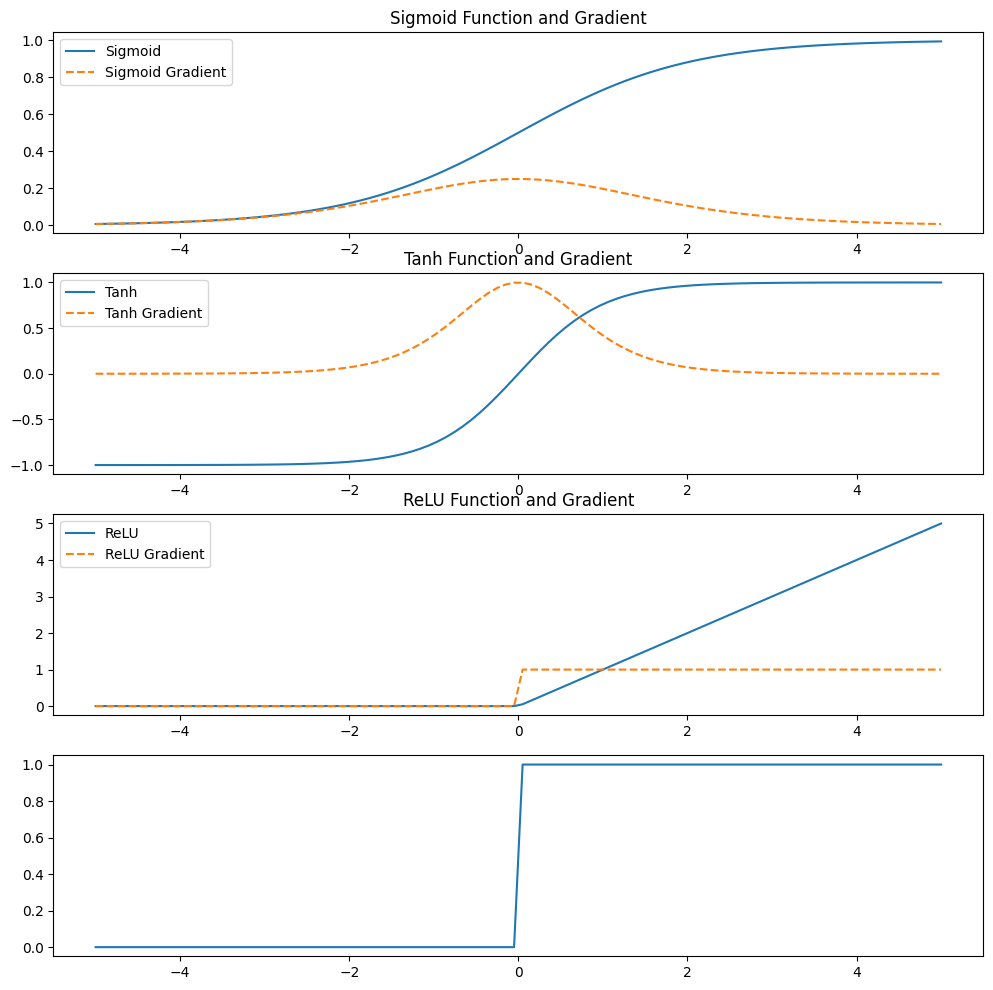

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Define the functions
def tanh(x):
    return tf.tanh(x)

def step(x):
    return tf.cast(x > 0, tf.float32)

# Define the range for plotting
x = np.linspace(-5, 5, 100)

# Convert to TensorFlow tensors
x_tensor = tf.convert_to_tensor(x, dtype=tf.float32)


# Compute the gradients using GradientTape
with tf.GradientTape(persistent=True) as tape:
    tape.watch(x_tensor)
    
    # Compute the function values
    relu_values = tf.nn.relu(x_tensor)
    sigmoid_values = tf.nn.sigmoid(x_tensor)
    tanh_values = tanh(x_tensor)
    step_values = step(x_tensor)

relu_gradients = tape.gradient(relu_values, x_tensor)
sigmoid_gradients = tape.gradient(sigmoid_values, x_tensor)
tanh_gradients = tape.gradient(tanh_values, x_tensor)
step_gradients = tape.gradient(step_values, x_tensor)

# Plot each function and its gradient in separate subplots
# Plot each function and its gradient in the same axes
plt.figure(figsize=(12, 12))

# Sigmoid function and its gradient
plt.subplot(4, 1, 1)
plt.plot(x, sigmoid_values, label='Sigmoid')
plt.plot(x, sigmoid_gradients, label='Sigmoid Gradient', linestyle='--')
plt.title('Sigmoid Function and Gradient')
plt.legend()

# Tanh function and its gradient
plt.subplot(4, 1, 2)
plt.plot(x, tanh_values, label='Tanh')
plt.plot(x, tanh_gradients, label='Tanh Gradient', linestyle='--')
plt.title('Tanh Function and Gradient')
plt.legend()

# ReLU function and its gradient
plt.subplot(4, 1, 3)
plt.plot(x, relu_values, label='ReLU')
plt.plot(x, relu_gradients, label='ReLU Gradient', linestyle='--')
plt.title('ReLU Function and Gradient')
plt.legend()

# Step function and its gradient
plt.subplot(4, 1, 4)
plt.plot(x, step_values, label='Step')
plt.plot(x, step_gradients, label='Step Gradient', linestyle='--')
plt.title('Step Function and Gradient')
plt.legend()

plt.tight_layout()
plt.show()

## Weights Initialization

If we initialize the weights of the neurons in a neural network to zeros, just like logistic regression, all neurons in a given layer would have the same output for the same input. During backpropagation, all weights would receive the same gradient updates, leading to symmetric weight updates. In other words, the neuorns will have the same weights at all stages of the training.

Subsequent layers would also learn the same features. As a result, the network would fail to learn meaningful representations of the data, and training would be ineffective.

The most common initialization techniques are called `Xavier` and `He`:

**1. Xavier Initialization:**
$$W \sim \mathcal{N}\left(0, \frac{2}{n_{\text{in}} + n_{\text{out}}}\right)$$


**2. He Initialization:**
$$W \sim \mathcal{N}\left(0, \frac{2}{n_{\text{in}}}\right)$$

- $W$ represents the weights being initialized.
  
- $\mathcal{N}\left(\mu, \sigma^2 \right)$ denotes a Gaussian (normal) distribution with mean $\mu$ and variance $\sigma^2$
  
- $\frac{2}{n_{\text{in}}}$ is the number of neurons in the layer previous to the one being initialized
  
- $\frac{2}{n_{\text{out}}}$ is the number of neurons in the layer being initialized

Depends on what activation function we are using, if we are using **ReLU** activation (which we will) it is better to use **He initialization**. The key is to initialize the weights to values that have a variance 2/n. The reduces the risk of Vanishing/Exploding gradients, and thus speed up networks.